# Forbes 2000 Largest Companies Analysis (2019)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statistics as stats
import csv
import re

# Spider forbes2 needs to be fixed
# do more year stuff
# do a heatmap
# gonna need plots for groupby country and industry
# compare top 100 with the middle of the table

### Import Scraped Data

In [2]:
forbes1 = pd.read_csv("forbes1.csv", header = None)
forbes2 = pd.read_csv("forbes2.csv", header = None)

### Set up data frame for analysis

In [3]:
forbes1.shape

(2001, 6)

In [4]:
forbes1.columns = ['Company', 'Country', 'Sales', 'Profits', 'Assets', 'Market Value']

In [5]:
forbes1.head()

,Company,Country,Sales,Profits,Assets,Market Value
0,ICBC,China,$165.3 B,$43.7 B,"$4,210.9 B",$311 B
1,China Construction Bank,China,$143.2 B,$37.2 B,"$3,631.6 B",$261.2 B
2,JPMorgan Chase,United States,$118.2 B,$26.5 B,"$2,609.8 B",$387.7 B
3,Berkshire Hathaway,United States,$235.2 B,$39.7 B,$702.7 B,$491.9 B
4,Agricultural Bank of China,China,$129.3 B,$29.6 B,"$3,439.3 B",$184.1 B


In [6]:
forbes2.shape

(2027, 7)

In [7]:
forbes2 = forbes2.drop_duplicates()

In [8]:
forbes2.shape

(1998, 7)

In [9]:
forbes2.columns = ['CompRank', 'Market Capitalization', 'Industry', 'Founded', 'Country', 'Chairman', 'Employees']

In [10]:
forbes2.head()

,CompRank,Market Capitalization,Industry,Founded,Country,Chairman,Employees
0,#1 ICBC,$311B,Major Banks,1984,China,Shu Gu,"453,048"
1,#2 China Construction Bank,$261.2B,Major Banks,1954,China,Wang Zuji,"352,621"
2,#3 JPMorgan Chase,$387.7B,Major Banks,1968,United States,Jamie Dimon,"252,539"
3,#4 Berkshire Hathaway,$491.9B,Investment Services,1955,United States,Warren Buffett,"377,000"
4,#5 Agricultural Bank of China,$184.1B,Regional Banks,1951,China,Huan Zhao,"487,307"


### Fix column names so that the data frames can be merged
CompRank combines the rank and name so they will be split and placed into separate columns

In [11]:
forbes2[["Rank", "Name"]] = forbes2['CompRank'].str.split(n = 1, expand = True)

forbes2 = forbes2.drop(['CompRank'], axis = 1)

forbes2.columns = ['Market Value', 'Industry', 'Founded', 'Country', 'Chairman', 'Employees', 'Rank', 'Company']

# Merge data frames
And fix columns

In [12]:
forbes = forbes2.merge(forbes1, on = 'Company')

forbes.columns

Index(['Market Value_x', 'Industry', 'Founded', 'Country_x', 'Chairman',
       'Employees', 'Rank', 'Company', 'Country_y', 'Sales', 'Profits',
       'Assets', 'Market Value_y'],
      dtype='object')

In [13]:
forbes = forbes.drop(["Market Value_x", "Country_x"], axis = 1)

In [14]:
cols = forbes.columns.tolist()
cols = ['Rank', 'Company', 'Country_y', 'Industry', 'Assets', 'Sales', 'Profits', 'Market Value_y', 'Employees', 'Founded', 'Chairman']

forbes = forbes[cols]

forbes = forbes.rename(columns = {'Country_y': 'Country', 'Market Value_y': 'Market Capitalization'})

In [15]:
forbes.shape

(1967, 11)

In [16]:
forbes.head()

,Rank,Company,Country,Industry,Assets,Sales,Profits,Market Capitalization,Employees,Founded,Chairman
0,#1,ICBC,China,Major Banks,"$4,210.9 B",$165.3 B,$43.7 B,$311 B,"453,048",1984,Shu Gu
1,#2,China Construction Bank,China,Major Banks,"$3,631.6 B",$143.2 B,$37.2 B,$261.2 B,"352,621",1954,Wang Zuji
2,#3,JPMorgan Chase,United States,Major Banks,"$2,609.8 B",$118.2 B,$26.5 B,$387.7 B,"252,539",1968,Jamie Dimon
3,#4,Berkshire Hathaway,United States,Investment Services,$702.7 B,$235.2 B,$39.7 B,$491.9 B,"377,000",1955,Warren Buffett
4,#5,Agricultural Bank of China,China,Regional Banks,"$3,439.3 B",$129.3 B,$29.6 B,$184.1 B,"487,307",1951,Huan Zhao


### Fix mismatched data
Some data was mismatched in the second scraper and unfortunately have to drop some rows because the webpage has been updated.

In [17]:
forbes['Employees'] = forbes['Employees'].astype(str)
forbesFix =  forbes.loc[forbes['Employees'].str.contains('[A-Za-z]')].index
forbes.drop(forbesFix, inplace=True)

In [18]:
forbes['Employees'] = forbes['Employees'].str.replace(",", "")
forbes["Employees"] = pd.to_numeric(forbes["Employees"])

In [19]:
forbes.shape

(1806, 11)

### Create function to convert dollar values

In [20]:
def convert_str_to_float(s):
    try:
        num, order = s.strip().split()
        num = float(num)
        if order == 'B':
            return num * 1000000000
        elif order == 'M':
            return num * 1000000
        else:
            pass
    except:
        pass

### Convert dollar values to float
Looks like $ may give you issues in a future python update

In [21]:
forbes['Assets'] = forbes['Assets'].str.replace(",", "")
forbes['Assets'] = forbes['Assets'].str.replace("$", "")
forbes['Assets'] = forbes['Assets'].apply(convert_str_to_float)

C:\Users\valfe\AppData\Local\Temp\ipykernel_19348\2453056257.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  forbes['Assets'] = forbes['Assets'].str.replace("$", "")


In [22]:
forbes['Sales'] = forbes['Sales'].str.replace(",", "")
forbes['Sales'] = forbes['Sales'].str.replace("$", "")
forbes['Sales'] = forbes['Sales'].apply(convert_str_to_float)

C:\Users\valfe\AppData\Local\Temp\ipykernel_19348\2184177535.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  forbes['Sales'] = forbes['Sales'].str.replace("$", "")


In [23]:
forbes['Profits'] = forbes['Profits'].str.replace(",", "")
forbes['Profits'] = forbes['Profits'].str.replace("$", "")
forbes['Profits'] = forbes['Profits'].apply(convert_str_to_float)

C:\Users\valfe\AppData\Local\Temp\ipykernel_19348\2489106819.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  forbes['Profits'] = forbes['Profits'].str.replace("$", "")


In [24]:
forbes['Market Capitalization'] = forbes['Market Capitalization'].str.replace(",", "")
forbes['Market Capitalization'] = forbes['Market Capitalization'].str.replace("$", "")
forbes['Market Capitalization'] = forbes['Market Capitalization'].apply(convert_str_to_float)

C:\Users\valfe\AppData\Local\Temp\ipykernel_19348\1217367912.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  forbes['Market Capitalization'] = forbes['Market Capitalization'].str.replace("$", "")


##### Numerical vs Categorical features

In [25]:
forbes = forbes.apply(pd.to_numeric, errors='ignore')

numerical_features = forbes.dtypes[forbes.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_features))

categorical_features = forbes.dtypes[forbes.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_features))

Number of Numerical features:  6
Number of Categorical features:  5


In [26]:
print(categorical_features)

Index(['Rank', 'Company', 'Country', 'Industry', 'Chairman'], dtype='object')


In [27]:
print(numerical_features)

Index(['Assets', 'Sales', 'Profits', 'Market Capitalization', 'Employees',
       'Founded'],
      dtype='object')


### Fix Missing Values

In [28]:
total = forbes.isnull().sum().sort_values(ascending=False)
percent = (forbes.isnull().sum()/forbes.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data.Percent > 0]

,Total,Percent
Assets,3,0.001661
Market Capitalization,2,0.001107


In [29]:
forbes.loc[forbes['Assets'].isnull()]

,Rank,Company,Country,Industry,Assets,Sales,Profits,Market Capitalization,Employees,Founded,Chairman
824,#842,Infineon Technologies,Germany,Semiconductors,NaN,8.500000e+09,1.300000e+09,3.240000e+10,37479,1999,Reinhard Ploss
1623,#1650,IndusInd Bank,India,Regional Banks,NaN,2.800000e+09,4.280000e+08,1.690000e+10,25314,1994,Romesh Sobti
1831,#1860,Bank of Greece,Greece,Major Banks,NaN,1.700000e+09,1.100000e+09,3.540000e+08,1864,1927,Konstantinos Michalidis


In [30]:
forbes.loc[forbes['Market Capitalization'].isnull()]

,Rank,Company,Country,Industry,Assets,Sales,Profits,Market Capitalization,Employees,Founded,Chairman
1087,#1108,Hainan Airlines,China,Airline,2.960000e+10,9.400000e+09,5.830000e+08,NaN,24772,1989,Jian Sun
1227,#1250,Wanhua Chemical Group,China,Specialized Chemicals,1.060000e+10,8.300000e+09,1.900000e+09,NaN,9165,1998,Yun Che


Not sure what to do with missing values yet. They are all in foreign companies and could just be due to lack of information. Imputing with the mean could be a good option.

# Analysis

### Year Stuff
Start by grouping the data on 'Founded' and create a separate data frame for the top 20 so you can plot the results.

In [31]:
forbes_FoundedCount = forbes.groupby('Founded', as_index = False).count()

forbes_FoundedCount = forbes_FoundedCount.rename(columns = {'Rank': 'Number of Companies Founded'})
forbes_FoundedCount = forbes_FoundedCount.rename(columns = {'Founded': 'Year'})

forbes_FoundedCount = forbes_FoundedCount.sort_values(by = ['Number of Companies Founded'], ascending = False)

forbes_FoundedCountTop = forbes_FoundedCount.iloc[:20]

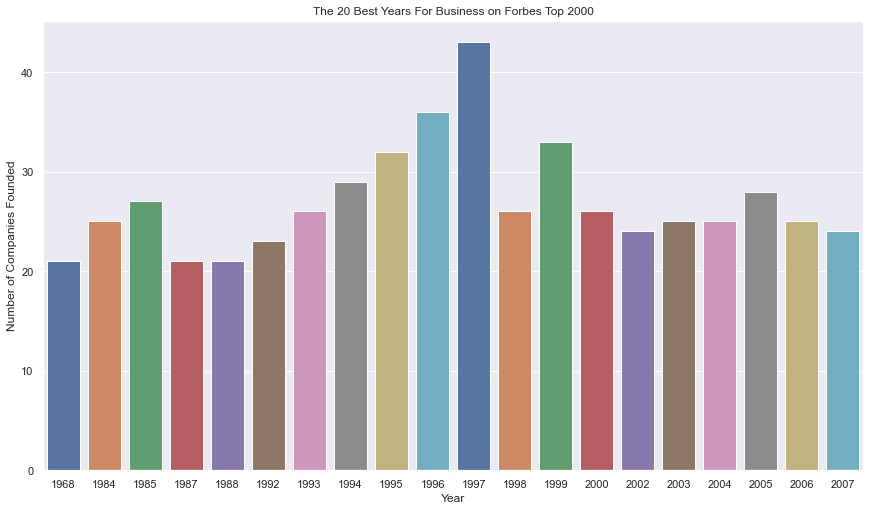

In [32]:
sns.set(rc={'figure.figsize':(14.7,8.27)})

founded_bar = sns.barplot(x = 'Year', y = 'Number of Companies Founded', data = forbes_FoundedCountTop, palette = 'deep').set_title("The 20 Best Years For Business on Forbes Top 2000")

##### We can see a huge boom in the 1990's as well as the 2000's. 

Lets compare each decade to see when the biggest chunk of these companies were founded.

In [33]:
forbes_FoundedDecade = pd.DataFrame(data=forbes)

lbls = ['1800s', '1810s', '1820s', '1830s', '1840s', '1850s', '1860s', '1870s', '1880s', '1890s', '1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s']
forbes_FoundedDecade['Decade'] = pd.cut(forbes.Founded, range(1800,2020,10), right=False, labels = lbls)

In [34]:
forbes_FoundedDecade = forbes_FoundedDecade.groupby('Decade', as_index = False).count()

forbes_FoundedDecade = forbes_FoundedDecade.rename(columns = {'Rank': 'Number of Companies Founded'})

forbes_FoundedDecade = forbes_FoundedDecade.sort_values(by = ['Decade'], ascending = False)

forbes_FoundedDecadeTop = forbes_FoundedDecade.iloc[:20]

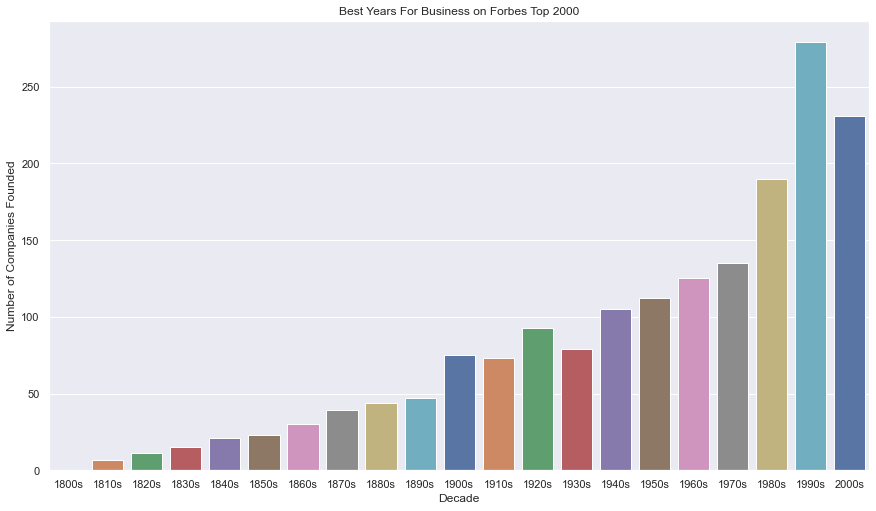

In [35]:
sns.set(rc={'figure.figsize':(14.7,8.27)})

founded_bar = sns.barplot(x = 'Decade', y = 'Number of Companies Founded', data = forbes_FoundedDecadeTop, palette = 'deep').set_title("Best Years For Business on Forbes Top 2000")

This confirms my suspicions that the 90's were in fact the greatest decade of all time.

The dip in the 2000s could be due to multiple different factors. It may not even be due to a decline in economic activity, but due to the fact that they were founded so recently and are still growing substantially.

In [36]:
##### Look into grouping by industry and year/decade to find when certain industries boomed #####

### Group by country:

In [37]:
forbes_Country = forbes.groupby('Country', as_index = False).count()

forbes_Country = forbes_Country.rename(columns = {'Rank': 'Number of Companies Founded'})

cols = ['Country', 'Number of Companies Founded']
forbes_CountryTop = forbes_Country[cols].sort_values('Number of Companies Founded', ascending = False).iloc[:20]

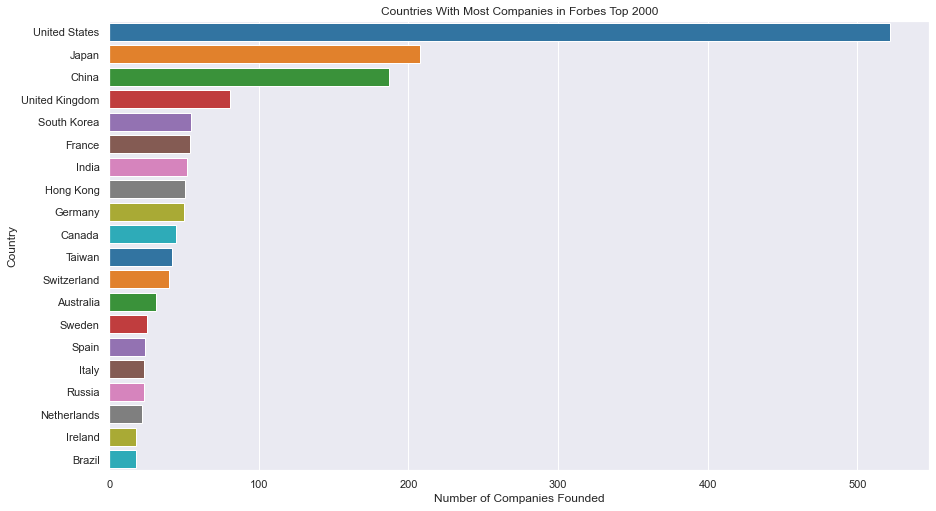

In [38]:
sns.set(rc={'figure.figsize':(14.7,8.27)})

country_bar = sns.barplot(x = 'Number of Companies Founded', y = 'Country', data = forbes_CountryTop, orient = 'h', palette = 'tab10').set_title("Countries With Most Companies in Forbes Top 2000")

##### Grouping by country and decade: 
Comparing how the top four of the previous chart compare over the decades

In [39]:
forbes_UJCU = pd.DataFrame(data = forbes.loc[forbes['Country'].isin(["United States", "Japan", "China", "United Kingdom"])])

lbls = ['1800s', '1810s', '1820s', '1830s', '1840s', '1850s', '1860s', '1870s', '1880s', '1890s', '1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s']

forbes_UJCU['Decade'] = pd.cut(forbes_UJCU.Founded, range(1800,2020,10), right=False, labels = lbls)

In [40]:
forbes_UJCU = forbes_UJCU.groupby(['Country', 'Decade'], as_index = False).size()
forbes_UJCU = forbes_UJCU.rename(columns = {'size': 'Number of Companies Founded'})

In [41]:
forbes_UJCU

,Country,Decade,Number of Companies Founded
0,China,1800s,0
1,China,1810s,0
2,China,1820s,0
3,China,1830s,0
4,China,1840s,0
...,...,...,...
79,United States,1960s,37
80,United States,1970s,44
81,United States,1980s,77
82,United States,1990s,69


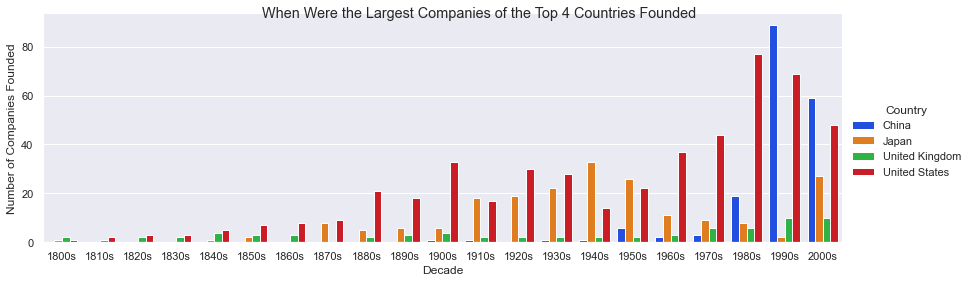

In [42]:
ujcu = sns.catplot(data = forbes_UJCU, kind = "bar", x = "Decade", y = "Number of Companies Founded", hue = "Country", palette = "bright", aspect = 3, height = 4)
ujcu.fig.suptitle("When Were the Largest Companies of the Top 4 Countries Founded")
ujcu.legend.set_title("Country")

In [43]:
############ Maybe something here?? ###############

##### Good place for US best years

In [44]:
forbes_US = pd.DataFrame(data = forbes.loc[forbes["Country"] == "United States"])

forbes_USFounded = forbes_US.groupby('Founded', as_index = False).count().sort_values(by = 'Rank', ascending = False).iloc[:20]

forbes_USFounded = forbes_USFounded.rename(columns = {'Rank': 'Number of Companies Founded'})

forbes_USFounded = forbes_USFounded.rename(columns = {'Founded': 'Year'})

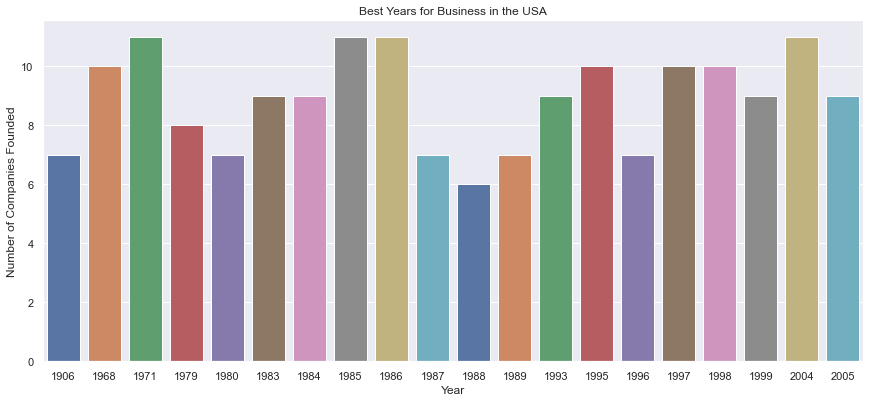

In [45]:
sns.set(rc={'figure.figsize':(14.7, 6.27)})

USfounded_bar = sns.barplot(x = 'Year', y = 'Number of Companies Founded', data = forbes_USFounded, palette = 'deep').set_title("Best Years for Business in the USA")

### Group by Industry

In [46]:
forbes_Industry = forbes.groupby('Industry', as_index = False).count()

forbes_Industry = forbes_Industry.rename(columns = {'Rank': 'Number of Companies'})

cols = ['Industry', 'Number of Companies']
forbes_IndustryTop = forbes_Industry[cols].sort_values('Number of Companies', ascending = False).iloc[:20]

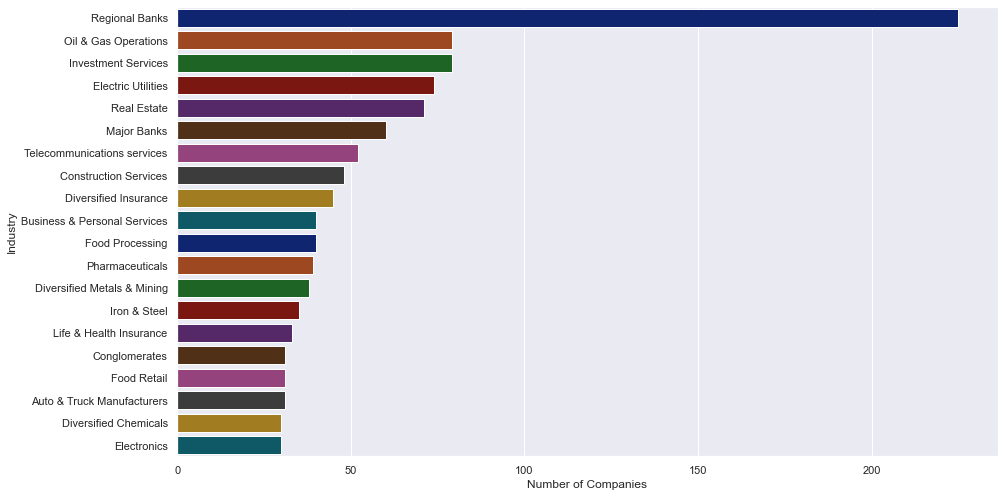

In [47]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
industry_bar = sns.barplot(x = 'Number of Companies', y='Industry', data = forbes_IndustryTop, palette = 'dark', orient = 'h')

##### US Industries

In [48]:
forbes_US = pd.DataFrame(data = forbes.loc[forbes["Country"] == "United States"])
forbes_USIndustry = forbes_US.groupby('Industry', as_index = False).count()

forbes_USIndustry = forbes_USIndustry.rename(columns = {'Rank': 'Number of Companies'})

cols = ['Industry', 'Number of Companies']
forbes_USIndustryTop = forbes_USIndustry[cols].sort_values('Number of Companies', ascending = False).iloc[:20]

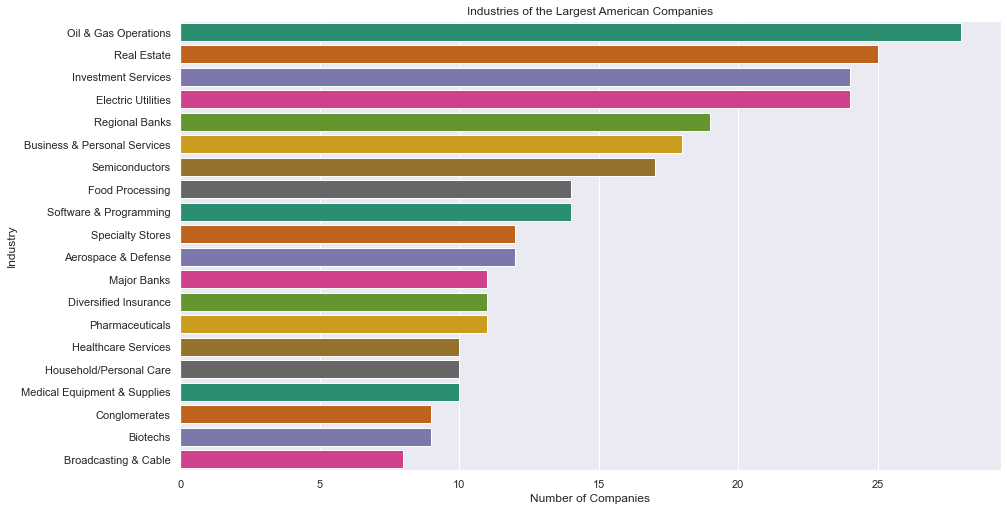

In [49]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
USIndustry_bar = sns.barplot(x = 'Number of Companies', y = 'Industry', data = forbes_USIndustryTop, orient = 'h', palette = 'Dark2').set_title("Industries of the Largest American Companies")

### Group by Country and Industry
You will probably want to do a for loop to get plots for each country

In [50]:
forbes_country_industry = forbes.groupby(['Country', 'Industry']).size()

In [51]:
forbes_country_industry.head(100)

Country    Industry                    
Argentina  Oil & Gas Operations            1
           Regional Banks                  1
Australia  Airline                         1
           Business & Personal Services    1
           Casinos & Gaming                1
                                          ..
China      Diversified Insurance           2
           Diversified Metals & Mining     8
           Diversified Utilities           1
           Drug Retail                     1
           Electric Utilities              8
Length: 100, dtype: int64

In [ ]:
################ Continue Here #########################

In [52]:
countries = list(forbes.Country.unique())

In [ ]:
for country in countries:
    country_ = forbes[forbes['Country'] == country]
    dims = (14, 8)
    fig, ax = plt.subplots(figsize = dims)
    sns.lineplot(x = 'Industry', y = 'Country', data = forbes_country_industry)

##### Groupby country, industry, and decade
For loop?

##### Group by industry and founded

In [135]:
###############################################################

In [122]:
forbes_IndustryFounded = forbes_US.groupby(['Industry', 'Founded'], as_index = False).sum()

In [126]:
forbes_IndustryFounded

,Industry,Founded,Assets,Sales,Profits,Market Capitalization,Employees
0,Advertising,1930,1.220000e+10,8.300000e+09,5.430000e+08,9.400000e+09,50200
1,Advertising,1986,2.350000e+10,1.530000e+10,1.100000e+09,1.710000e+10,77300
2,Aerospace & Defense,1922,3.050000e+10,2.560000e+10,2.200000e+09,6.140000e+10,64000
3,Aerospace & Defense,1928,9.100000e+09,6.600000e+09,-1.150000e+08,1.760000e+10,15000
4,Aerospace & Defense,1929,1.135000e+11,9.580000e+10,9.200000e+09,1.995000e+11,140800
...,...,...,...,...,...,...,...
495,Tobacco,1847,4.310000e+10,2.960000e+10,6.000000e+09,1.262000e+11,80600
496,Tobacco,1985,4.390000e+10,1.960000e+10,1.070000e+10,1.045000e+11,8300
497,Trucking,1934,3.100000e+09,3.500000e+09,5.070000e+08,1.210000e+10,19183
498,Trucking,1961,4.400000e+09,7.500000e+09,7.020000e+08,1.370000e+10,24681


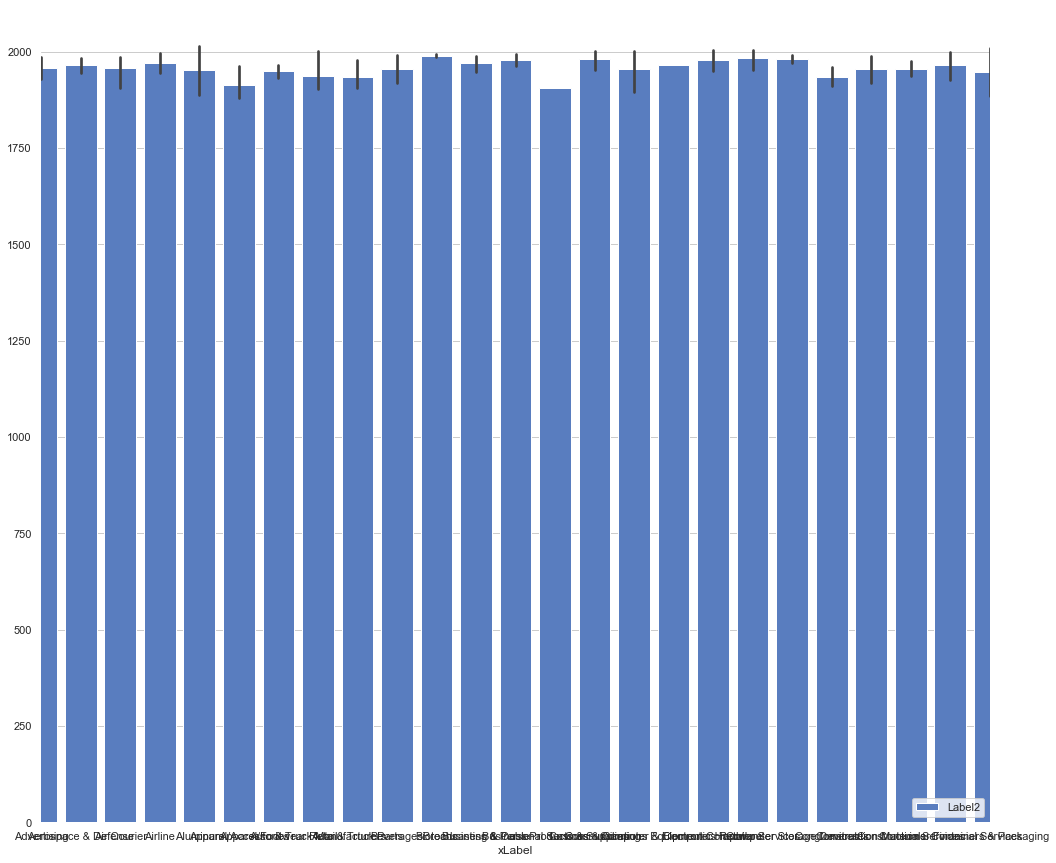

In [134]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(17, 15))

# # Load the example car crash dataset
# founded_industry_plot = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# # total
# sns.set_color_codes("pastel")
# sns.barplot(x="Industry", y="Founded", data=forbes_IndustryFounded,
#             label="Label", color="b")

#partition
sns.set_color_codes("muted")
sns.barplot(x="Industry", y="Founded", data=forbes_IndustryFounded,
            label="Label2", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="xLabel")
sns.despine(left=True, bottom=True)

##### American Companies Grouped by Industry

### Top Companies vs Mid-Table

##### Regression/Scatter plots for numerical data: Assets, Sales, Profits, Market Cap, Employees

Start with correlation heatmap here and get rid of some of the less interesting scatterplots, too much bs here

In [115]:
forbes1 = forbesAssets.iloc[:100]

forbes2 = forbesAssets.iloc[950:1050]

In [116]:
forbes.corr()

,Assets,Sales,Profits,Market Capitalization,Employees,Founded
Assets,1.000000,0.367808,0.490986,0.320224,0.224837,-0.081017
Sales,0.367808,1.000000,0.571442,0.554797,0.634357,-0.069690
Profits,0.490986,0.571442,1.000000,0.714161,0.314648,-0.035513
Market Capitalization,0.320224,0.554797,0.714161,1.000000,0.308573,-0.032288
Employees,0.224837,0.634357,0.314648,0.308573,1.000000,-0.038618
Founded,-0.081017,-0.069690,-0.035513,-0.032288,-0.038618,1.000000


In [117]:
forbes1.corr()

,Assets,Sales,Profits,Market Capitalization,Employees,Founded
Assets,1.000000,0.189180,0.418485,0.220902,0.426774,0.080572
Sales,0.189180,1.000000,0.618335,0.690153,0.647995,0.046573
Profits,0.418485,0.618335,1.000000,0.829422,0.542113,0.091640
Market Capitalization,0.220902,0.690153,0.829422,1.000000,0.466316,0.059329
Employees,0.426774,0.647995,0.542113,0.466316,1.000000,0.066202
Founded,0.080572,0.046573,0.091640,0.059329,0.066202,1.000000


In [118]:
forbes2.corr()

,Assets,Sales,Profits,Market Capitalization,Employees,Founded
Assets,1.000000,0.072612,0.042090,0.054532,0.053327,0.135904
Sales,0.072612,1.000000,0.192992,0.285076,0.310946,-0.188410
Profits,0.042090,0.192992,1.000000,0.589800,0.186773,0.103027
Market Capitalization,0.054532,0.285076,0.589800,1.000000,0.210877,0.051217
Employees,0.053327,0.310946,0.186773,0.210877,1.000000,0.022724
Founded,0.135904,-0.188410,0.103027,0.051217,0.022724,1.000000


In [119]:
forbesAssets = forbes.sort_values("Assets", ascending = False)

Compare correlations here to justify which scatterplots you are making

In [99]:
#######################################################

# Assets vs Sales

Top 100

Text(0.5, 1.0, 'Top 100')

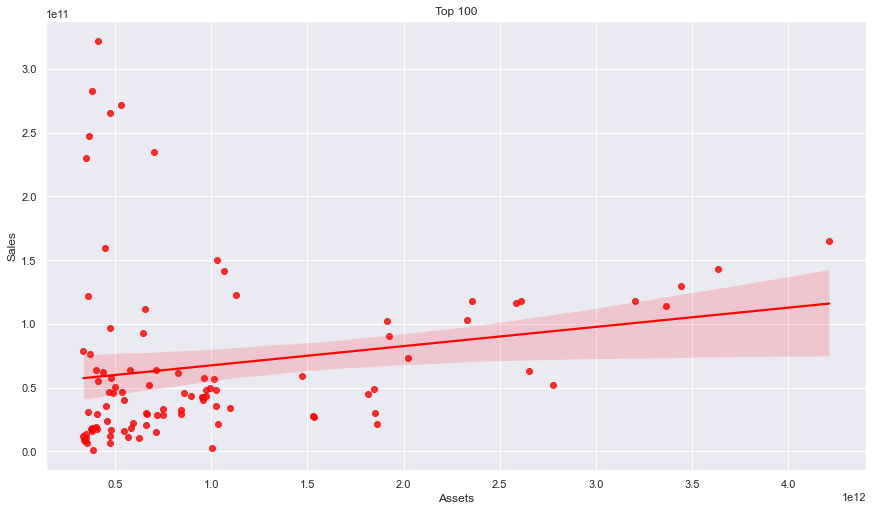

In [100]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Assets", y = "Sales", data = forbes1, color = 'red').set_title("Top 100")

Middle

Text(0.5, 1.0, 'Middle')

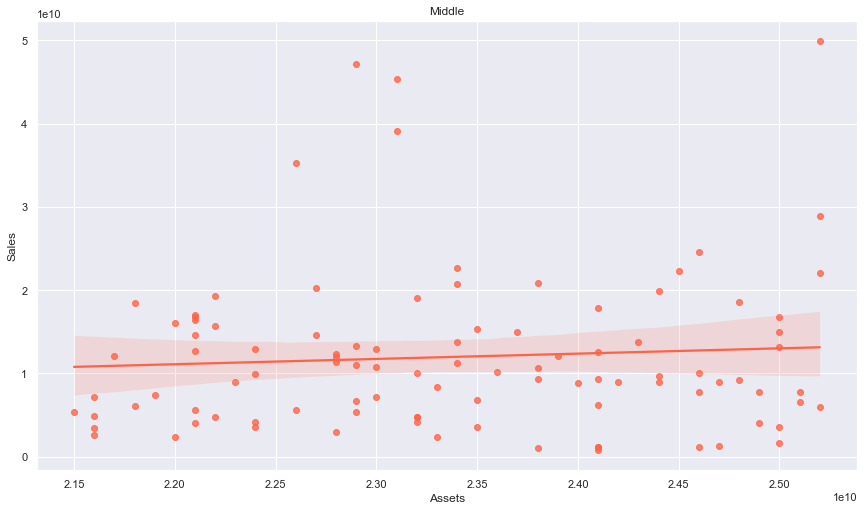

In [101]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Assets", y = "Sales", data = forbes2, color = "tomato").set_title("Middle")

All

Text(0.5, 1.0, 'Forbes Top 2000')

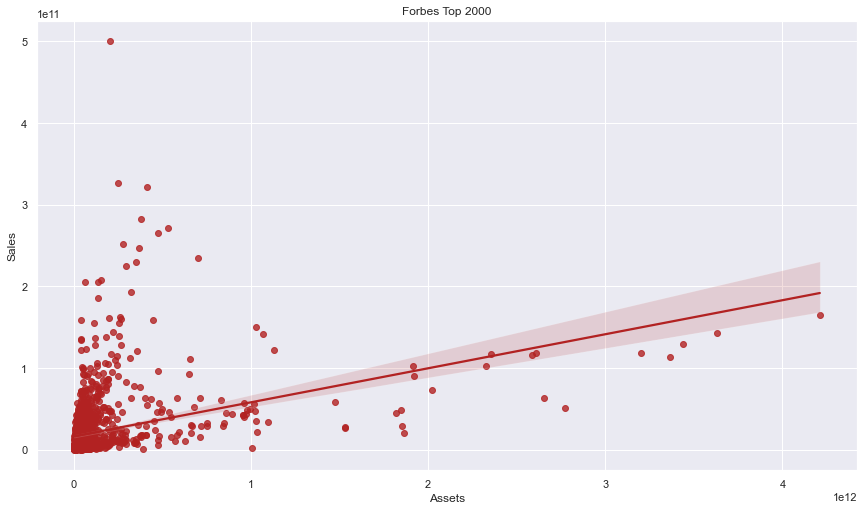

In [102]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Assets", y = "Sales", data = forbes, color = 'firebrick').set_title("Forbes Top 2000")

# Assets vs Market Cap

Top 100

Text(0.5, 1.0, 'Top 100')

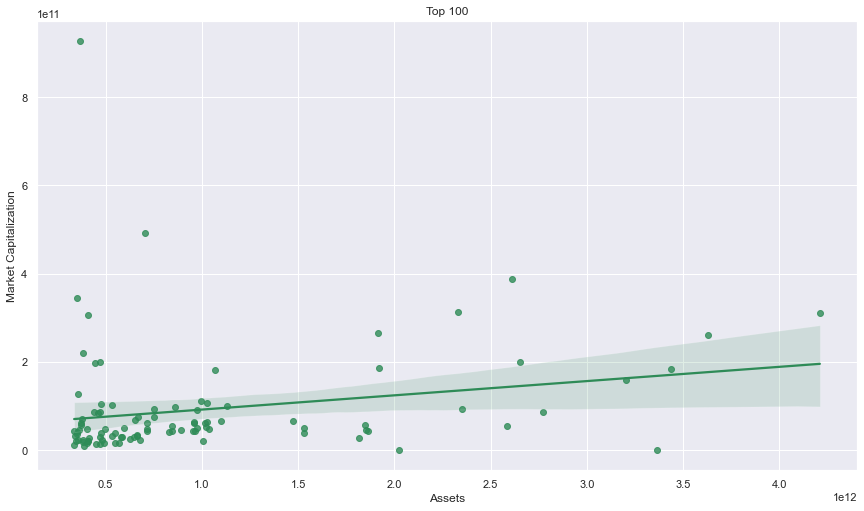

In [103]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Assets", y = "Market Capitalization", data = forbes1, color = 'seagreen').set_title("Top 100")

Middle

Text(0.5, 1.0, 'Middle')

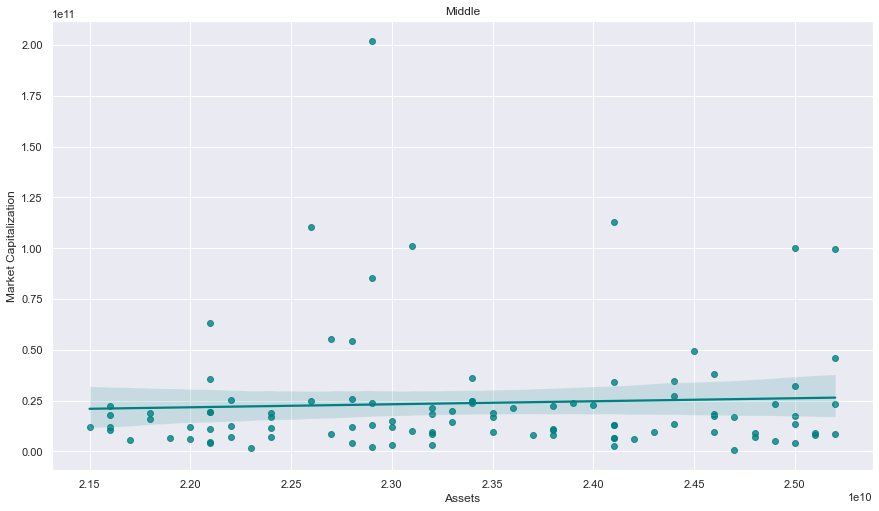

In [104]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Assets", y = "Market Capitalization", data = forbes2, color = 'teal').set_title("Middle")

All

Text(0.5, 1.0, 'Forbes Top 2000')

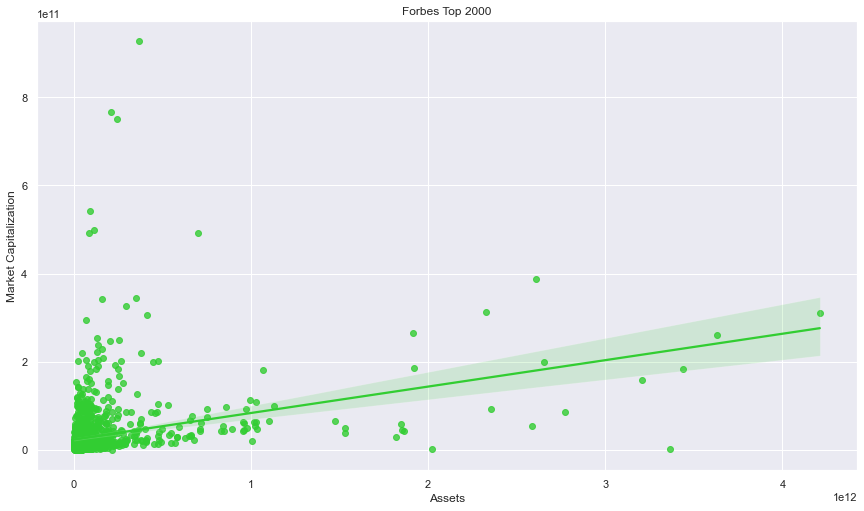

In [105]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Assets", y = "Market Capitalization", data = forbes, color = 'limegreen').set_title("Forbes Top 2000")

# Market Cap vs Profit

Top 100

Text(0.5, 1.0, 'Top 100')

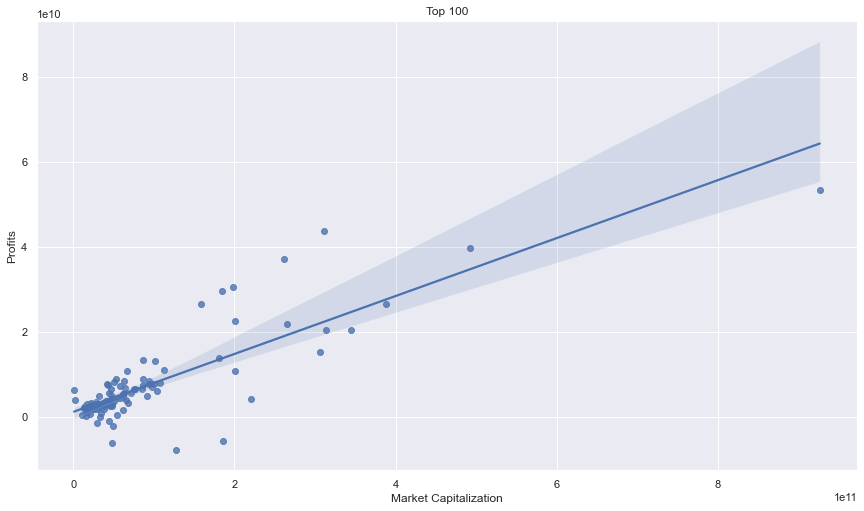

In [106]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Market Capitalization", y = "Profits", data = forbes1).set_title("Top 100")

Middle

Text(0.5, 1.0, 'Middle')

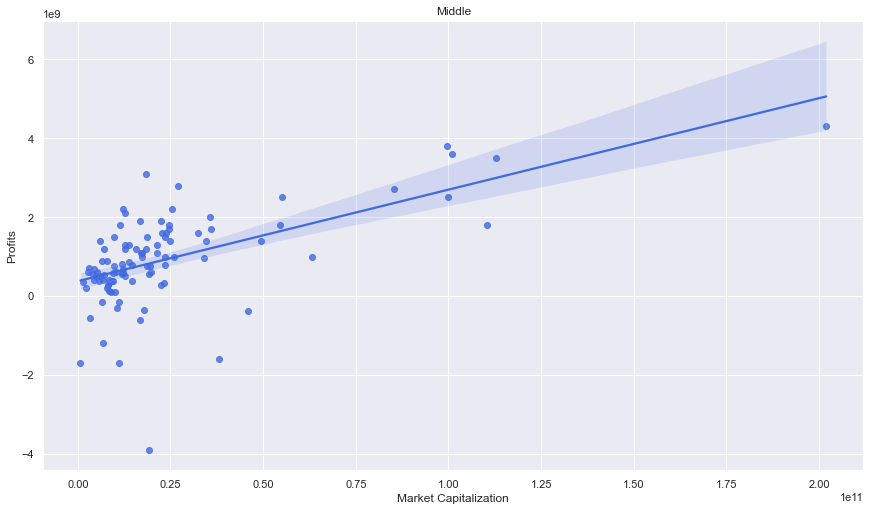

In [107]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Market Capitalization", y = "Profits", data = forbes2, color = 'royalblue').set_title("Middle")

All

Text(0.5, 1.0, 'Forbes Top 2000')

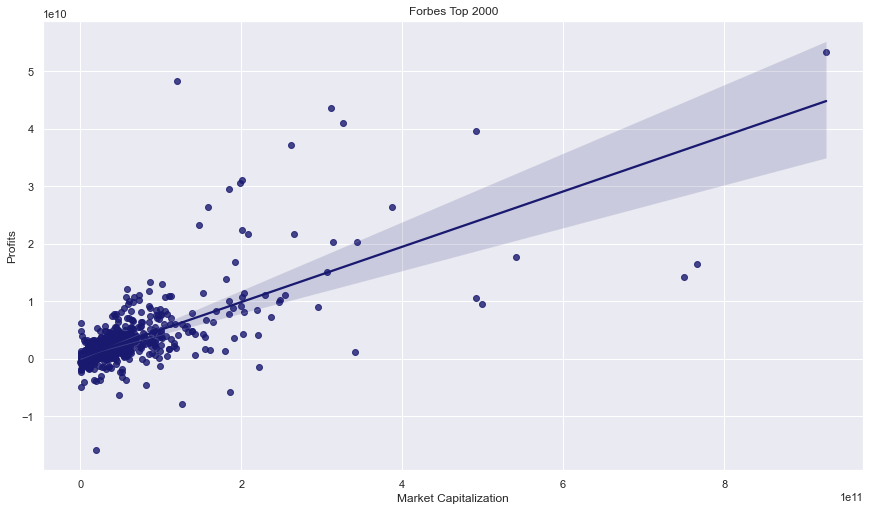

In [108]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Market Capitalization", y = "Profits", data = forbes, color = 'midnightblue').set_title("Forbes Top 2000")

# Assets vs Profit

Top 100

Text(0.5, 1.0, 'Top 100')

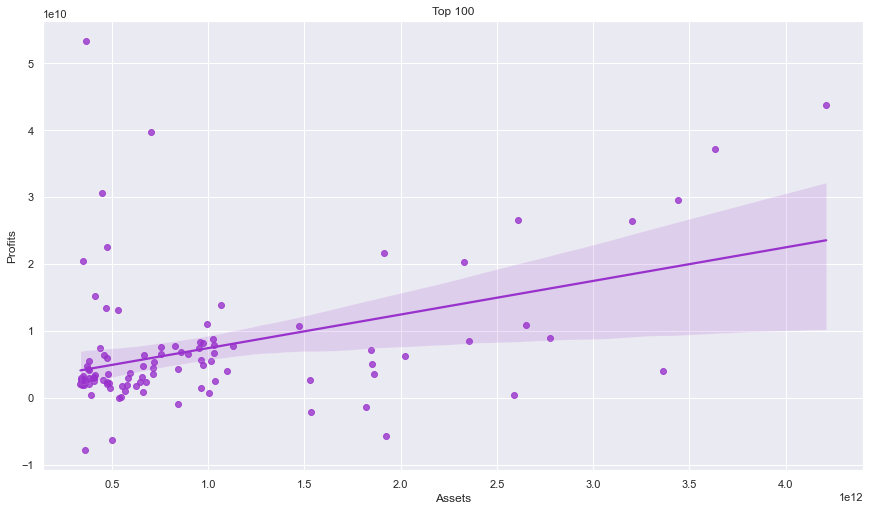

In [109]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Assets", y = "Profits", data = forbes1, color = "darkorchid").set_title("Top 100")

Middle

Text(0.5, 1.0, 'Middle')

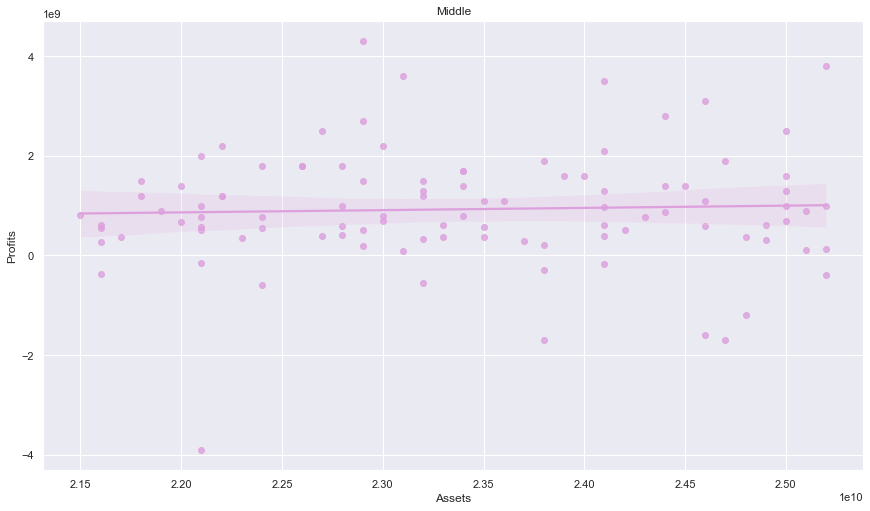

In [110]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Assets", y = "Profits", data = forbes2, color = 'plum').set_title("Middle")

All

Text(0.5, 1.0, 'Forbes Top 2000')

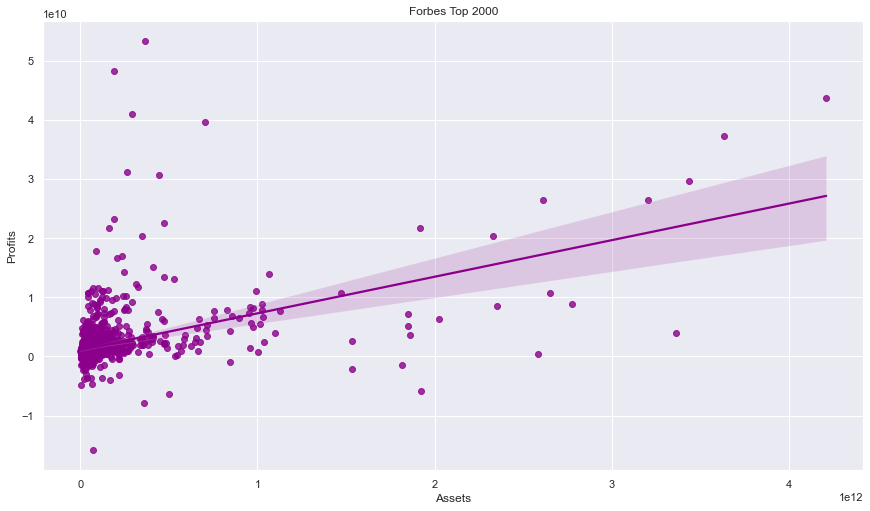

In [111]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Assets", y = "Profits", data = forbes, color = 'darkmagenta').set_title("Forbes Top 2000")

# Market Cap vs. Sales

Top 100

Text(0.5, 1.0, 'Top 100')

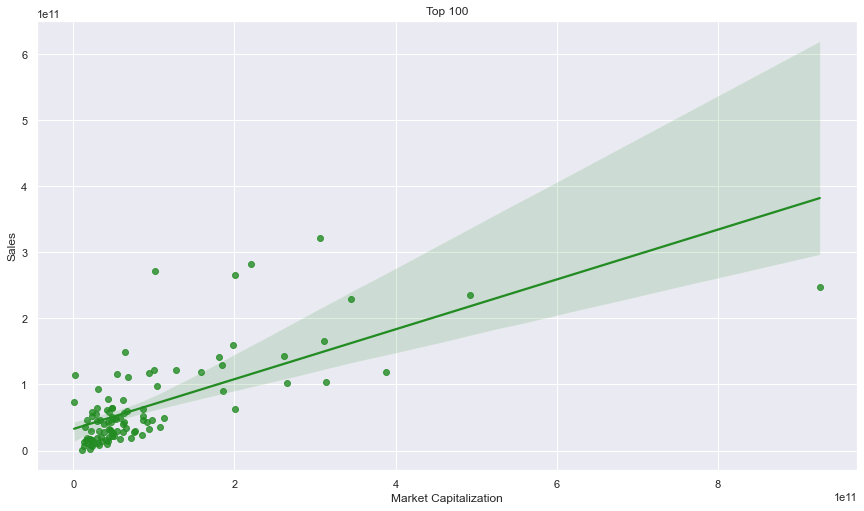

In [112]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Market Capitalization", y = "Sales", data = forbes1, color = 'forestgreen').set_title("Top 100")

Middle

Text(0.5, 1.0, 'Middle')

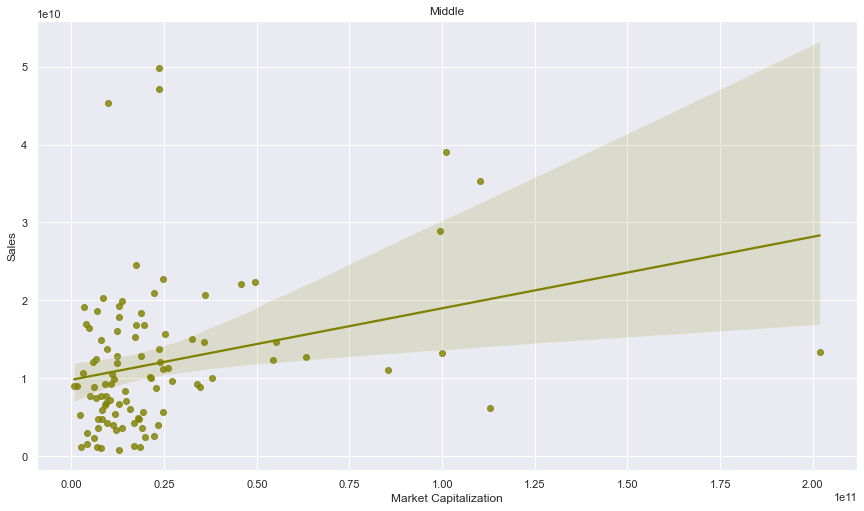

In [113]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Market Capitalization", y = "Sales", data = forbes2, color = 'olive').set_title("Middle")

All

Text(0.5, 1.0, 'Forbes Top 2000')

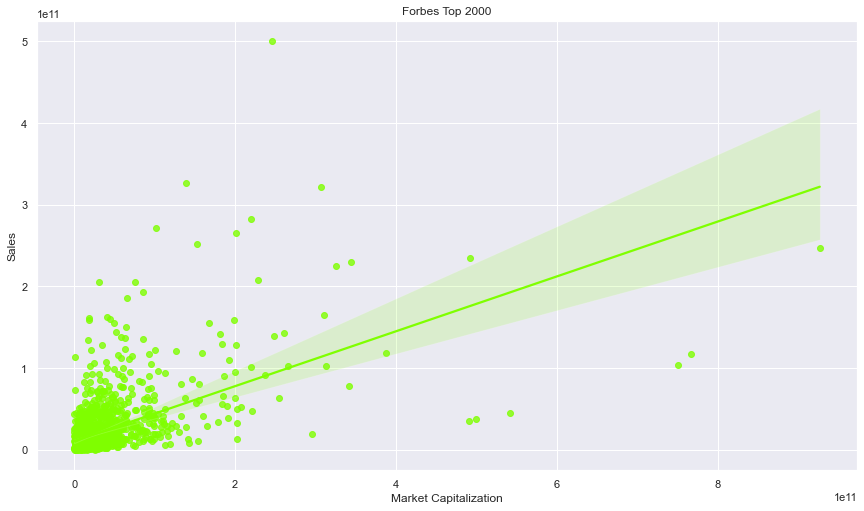

In [114]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Market Capitalization", y = "Sales", data = forbes, color = 'chartreuse').set_title("Forbes Top 2000")

# Conclusion

- Discuss findings about countries and their biggest industries

- Discuss the biggest industries overall

- Discuss when todays biggest companies were founded